In [227]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn import metrics
from sklearn.decomposition import PCA

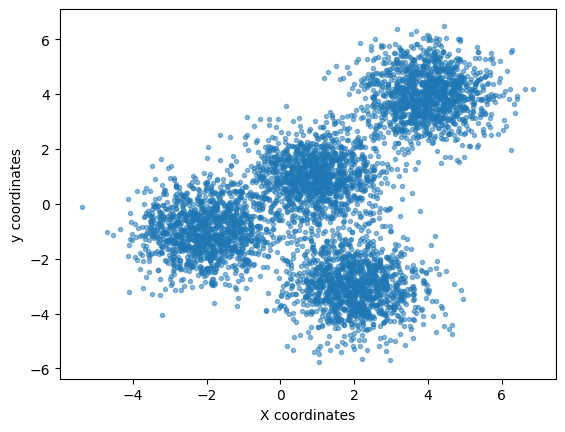

In [228]:
np.random.seed(0)

# 5000 points divided equally among clusters, centres as specified, and standard deviation of 0.9
X, y = make_blobs(n_samples=5000, centers=[[4,4], [-2, -1], [2, -3], [1, 1]], cluster_std=0.9)

# marker gives the shape of each point, in this case a small dot. alpha controls the transparency
plt.scatter(X[:,0], X[:,1],  marker='.', alpha=0.5)
plt.xlabel("X coordinates")
plt.ylabel("y coordinates")
plt.show()

In [229]:
# initialisation is k-means++ by default. n_init: how often k-means is run with different initial centroids. Keeps the best result.
kmeans = KMeans(n_clusters=4, n_init=12)

In [230]:
kmeans.fit(X)
kmeans_labels = kmeans.labels_
kmeans_cluster_centers = kmeans.cluster_centers_

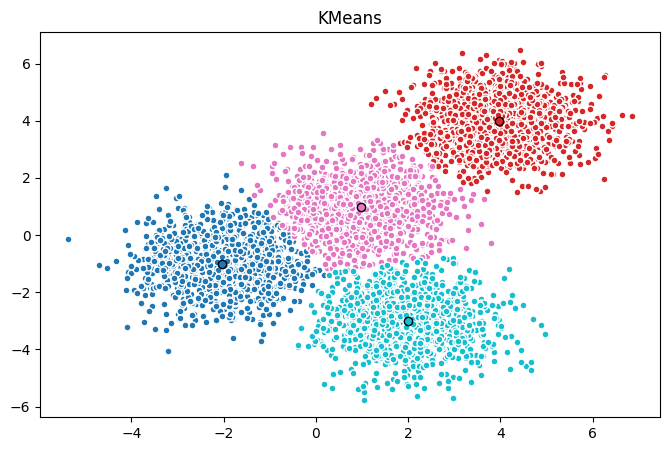

In [231]:
fig = plt.figure(figsize=(8, 5))
ax = fig.add_subplot(1, 1, 1)

colors = plt.cm.tab10(np.linspace(0, 1, len(set(kmeans_labels))))


for k, col in zip(range(len([[4, 4], [-2, -1], [2, -3], [1, 1]])), colors):
    my_members = (kmeans_labels == k)

    cluster_center = kmeans_cluster_centers[k]

    ax.plot(X[my_members, 0], X[my_members, 1], 'w', markerfacecolor=col, marker='.',ms=10)

    ax.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,  markeredgecolor='k', markersize=6)

ax.set_title('KMeans')
plt.show()